# Generated Forum Code Workbook

## Gradients

In the previous session, we had our first encounter with neural networks. This lesson takes a deeper dive of the material from Chapter 13.3 from Murphy, K. (2022); specifically, how to compute and use gradients. 



Gradients are fundamental to modern machine learning methods: these methods often don't permit a closed form, analytical solution to directly get the optimal values for the parameters. However, by computing the gradients (repeatedly), we can take "small steps" that take us closer to the optimal value. Specifically, we're interested in computing the gradients of the model parameters with respect to some loss value. By taking small steps in the negative direction of the gradient, we can "tune" the parameters such that the loss goes down, little by little.

### Basic Prep (2): Math exercise: Sigmoid example
So far, you've asked LLMs questions to prepare for class. Now it's time for you to be in the hot seat. Give the following prompt to your favorite LLM:



I'm an undergrad taking introductory machine learning. I have some background in statistics, linear algebra, and calculus. I'd like you to act as my professor and write a quiz to test me on gradient methods in neural networks. Use the sigmoid example found at this page: https://cs231n.github.io/optimization-2/ as the basis for the quiz. Please format your response as short-answer quiz with 3 open-ended questions about gradient descent and back-propagation. At least one of these questions should specifically ask about the relationship between Jacobians and neural network gradients.




For each question the LLM creates, answer to the best of your ability using the CS231n reading. Copy your answers into the chat with the LLM one at a time. Add the following prompt after each one 



"Here are my responses to question #X. Can you give me feedback, including a model answer for what you think would be a good response to your prompt?"



Repeat for all of your responses and ask the LLM some follow-ups. Some things I've noticed interviewing these systems is that their easily captured by high-level discussions of vanishing gradients without actually defining simpler terms like what a gradient actually is. Don't let them get away with it! Ask pointed follow ups. Here's a good example:



In a neural network we often compute the gradient on the activation of a single unit, and the Jacobian with respect to an entire layer of weights. Why?

### **ChatGPT-generated questions and my answers**

#### **Question 1**
**Q:** Explain the concept of gradient descent in the context of neural networks. How does gradient descent help optimize the weights and biases of a neural network during training? Mention any key hyperparameters or considerations when applying gradient descent.

**A:** In a feed-forward neural network, we assess the performance of network at the end of each epoch (aka complete data runthrough) and adjust the weights and biases based on a loss function. Essentially, a loss function tells the model how wrong is it by calculating the squared error between the output and the true labels for each category. In order to improve the network, we calculate the gradient of the loss function. The gradient is the collection of directions of steepest ascend for all dimensions. To minimize the error, we adjust the weights accordingly, moving in the opposite direction of the gradient (hence *descent*), given some learning rate.

**ChatGPT feedback:** Your answer provides a basic understanding of gradient descent in the context of neural networks. It mentions some key points but could benefit from a bit more detail and clarification. Here's an improved version of your answer:

In the context of a feed-forward neural network, gradient descent is a fundamental optimization technique used during training to minimize a defined loss function. The primary goal of gradient descent is to iteratively adjust the network's weights and biases to minimize the difference between the predicted outputs and the true labels for a given dataset.

Here's how gradient descent helps optimize the weights and biases:

1. **Loss Function:** First, we define a loss function, which quantifies the error or mismatch between the network's predictions and the actual target values. Common loss functions include mean squared error (MSE) or cross-entropy loss, depending on the problem.

2. **Gradient Calculation:** During each training iteration or epoch, we calculate the gradient of the loss function with respect to the network's parameters (weights and biases). This gradient represents the direction of the steepest ascent in the loss landscape.

3. **Weight Update:** Using the gradient information, we adjust the weights and biases of the network in the opposite direction of the gradient. This adjustment aims to minimize the loss function, making the network's predictions more accurate.

4. **Learning Rate:** The learning rate is a crucial hyperparameter in gradient descent. It controls the step size during weight updates. A larger learning rate can lead to faster convergence but may risk overshooting the optimal values, while a smaller learning rate ensures stability but may require more training epochs.

5. **Epochs:** Training typically occurs over multiple epochs, where the entire dataset is passed through the network. The choice of the number of epochs is another hyperparameter, and it depends on the convergence behavior of the training process.

In summary, gradient descent plays a central role in training neural networks by iteratively adjusting the weights and biases to minimize the loss function. Properly tuning hyperparameters like the learning rate and the number of epochs is essential for achieving efficient and effective training.

#### **Question 2**
**Q:** In the context of back-propagation in a neural network, what is the role of the Jacobian matrix? How does it relate to computing gradients for the network's parameters, such as weights and biases? Provide an example or illustration to clarify your explanation.

**A:** The Jacobian matrix represents the derivative of a vector-valued function with respect to a vector of input variables. Essentially, it describes how small changes in the input variables of a multivariate function result in changes in the output variables. In the neural network case, we are interested to change the weights and biases (inputs) based on cost (output). Hence, we calculate the Jacobians and use them to backpropagate and adjust the inputs.

**ChatGPT feedback:** Your answer provides a basic understanding of the Jacobian matrix and its role in back-propagation. However, it could benefit from a bit more detail and clarification, especially with respect to neural networks. Here's an improved version of your answer:


In the context of back-propagation in a neural network, the Jacobian matrix plays a crucial role in understanding how small changes in the network's parameters, such as weights and biases, impact the network's output. To clarify its significance, let's break it down:

1. **The Jacobian Matrix:** The Jacobian matrix represents the partial derivatives of the network's output with respect to its inputs. In this case, the inputs are the weights and biases of the neural network. Each element of the Jacobian matrix indicates how a small change in a particular weight or bias affects the overall output of the network.

2. **Back-Propagation:** During the training of a neural network, we aim to minimize a loss function by adjusting the weights and biases. Back-propagation is the process of computing gradients, which represent the sensitivity of the loss function to changes in these parameters. The Jacobian matrix helps us calculate these gradients efficiently.

3. **Example:** Consider a simple neural network with one input neuron, one hidden neuron, and one output neuron. We want to find the gradient of the loss with respect to a particular weight, say, the weight connecting the input neuron to the hidden neuron.

- We calculate the output of the network based on the current weights and biases.
- We compute the derivative of the loss with respect to the output of the network.
- To find the impact of the weight in question, we look at the corresponding element in the Jacobian matrix. This element tells us how the output of the network changes concerning the change in the weight.
- Multiplying the derivative of the loss with respect to the output by the Jacobian element gives us the gradient of the loss with respect to the weight, allowing us to update it during training.

In summary, the Jacobian matrix in the context of neural networks helps us quantify the impact of small changes in weights and biases on the network's output. This information is essential for efficiently computing gradients during back-propagation and optimizing the network's parameters.

#### **Question 3**
**Q:** Consider a neural network with multiple layers. During back-propagation, why is the chain rule of calculus crucial for calculating gradients efficiently? Describe the step-by-step process of using the chain rule to compute gradients for a specific weight or bias in a neural network layer.

**A:** The chain rule tells us how to backpropagate properly, combining the knowledge we have about the gradient of layer L and the local gradient of L-1 to calculate the gradient of L-1.  We need to work backwards, starting at the outermost level (the last layer) and multiplying the inner local derivatives by the outer ones.

**ChatGPT feedback:** Your response provides a basic understanding of the importance of the chain rule in back-propagation in neural networks. However, it could benefit from a bit more detail and clarity. Here's an improved version of your answer:

The chain rule of calculus is a fundamental concept that plays a crucial role in back-propagation within neural networks. It enables us to efficiently compute gradients for specific weights or biases in multiple layers of a neural network. Here's a step-by-step explanation of how the chain rule is applied:

1. **Starting at the Last Layer**
- During back-propagation, we begin at the outermost layer of the neural network, which is the last layer, often referred to as layer L.
- We calculate the gradient of the loss function with respect to the output of layer L. This is done by taking the derivative of the loss function.

2. **Local Gradient of Layer L**
- Next, we compute the local gradient of layer L, which represents how the output of layer L changes concerning its inputs (weights, biases, and activations).
- This local gradient is typically calculated using the derivative of the activation function and the gradient of the loss with respect to the output of layer L.

3. **Chain Rule Propagation**
- Now comes the key application of the chain rule. We propagate the gradient backward to the previous layer, which is layer L-1.
- To do this, we multiply the local gradient of layer L (computed in Step 2) by the gradient of layer L-1 concerning its inputs.
- This multiplication effectively combines the knowledge of how layer L impacts the loss with how layer L-1 impacts layer L.

4. **Repeat for Each Layer**
- We repeat this process for each layer in the network, moving backward from layer L to layer L-1, then to L-2, and so on until we reach the input layer.
- At each step, we calculate the local gradient of the current layer and propagate it backward to the previous layer, using the chain rule.

5. **Gradients for Weights and Biases**
- To compute gradients for specific weights or biases within a layer, we extend the chain rule further. We take the gradient of the layer's output with respect to the weights or biases and multiply it by the propagated gradient from the previous layer.
- This process allows us to efficiently calculate gradients for weights and biases throughout the network.

In summary, the chain rule is crucial in back-propagation as it guides us in propagating gradients backward through the layers of a neural network. It enables us to efficiently compute gradients for specific weights and biases, facilitating the optimization of the network's parameters during training.

### Q2A: Coding exercise: Sigmoid example (3)



**Exercise 3.1**: 

Work out (on paper, or media of your choice) all the derivatives (the red values) in the example. Start at the rightmost value (the 1.00 in red). Your computed derivatives should match the ones in the diagram.



Here's a few hints:

- What's df/df for any f? (a.k.a. why is the right most value 1.00?)
- Remember backpropagation is a strictly local process: to compute a gradient you only need immediate parents/children node values.
- If you remember the material from CS111, recall each step is just the chain rule!
- For some (most) of the calculations, you'll need some combination of both nearby derivatives (red) and original (green) values.
- If you're really stuck, there's one completed value (in code form) in the next cell.


Of course, in real life computers do the forward/backward passes for us! Here's an implementation of the forward pass, and an incomplete implementation of the backwards pass. 



**Exercise 3.2**: Complete the code for the backwards pass below. There's a partially worked example in the box that follows this code.



(Note something important: we need to store all the intermediate values of the forward pass to reuse during the backwards pass.)

In [1]:
import numpy as np

# Forward pass
w0, w1, w2 = 2.00, -3.00, -3.00
x0, x1 = -1.00, -2.00

mul0 = w0 * x0  # -2.00
mul1 =  w1 * x1  # 6.00
sum01 = mul0 + mul1  # 4.00
sum012 = sum01 + w2  # 1.00

neg = -sum012  # -1.00
exp = np.exp(neg)  # 0.37
plus1 = exp + 1  # 1.37
invert = 1/plus1  # 0.73


# Backward pass
# Remember *all* derivatives are with respect to the final function invert
d_invert = 1.00  # this is d_invertd_invert, but we shorten to d_invert
# Here's one completed for you :)
d_plus1 = d_invert * (-1/plus1**2)  # this is d_invertd_plus_1, but we shorten to d_plus_1
d_exp = d_plus1 * 1
d_neg = d_exp * exp
d_sum012 = d_neg * -1

# Notice for gates with multple inputs, when going backward
# they are responsible for derivatives of multiple values!
d_w2, d_sum01 = d_sum012, d_sum012
d_mul0, d_mul1 = d_sum012, d_sum012

d_w1, d_x1 = x1*d_sum012, w1*d_sum012
d_w0, d_x0 = x0*d_sum012, w0*d_sum012

In [2]:
# check
assert(round(d_w1,2) == -0.39)
assert(round(d_w0,2) == -0.20)
assert(round(d_x1,2) == -0.59)
assert(round(d_x0,2) == 0.39)

### Q2B: Coding exercise: Calculus derivation (3)
Here's a worked out derivation to get you started:

w = [w1, w2, w3], x = [x1, x2, x3]

f(w,x) = wx = w1x1 + w2x2 + w3x3

**Exercise**: Calculate df/dw, that is, the derivatives for each component of w with respect to f.

**Answer**


The derivative calculation is very intuitive if we only look at wᵀx. If we take the derivative with respect to w, we get x.



Breaking it down by matrix element:



df/dw = [df/dw1, df/dw2, df/dw3]



df/dw1 = x1 + 0 + 0 = x1

df/dw2 = 0 + x2 + 0 = x2

df/dw3 = 0 + 0 + x3 = x3



[df/dw1, df/dw2, df/dw3] = [x1, x2, x3]



df/dw = x

### Core Questions (3): Coding exercise: Sigmoid example (vectorized)

Building towards the real world: real-world inputs can be tens, even thousands of dimensions (even MNIST is 28x28=784 dimensions). We can't just create a variable for each of these dimensions, so we store them as vectors (and you'll see in class, matrices), which are easier to work with once you get the hang of them. Again, the underlying math does not change, only our implementation does.

Exercise: Complete the code for the backward pass; however, this time w and x are vectors.

Hints:

Note that we've fused the multiply and add operations (w0*x0 + w1*x1) into the matrix multiply w^T x. You derived the gradients for both w and x above, so use it when you're coding now!

In [3]:
# Forward pass
w = np.array([2.00, -3.00])
b = -3.00

x = np.array([-1.00, -2.00])

dot = w.T @ x  # 4.00
summed = dot + b  # 1.00

neg = -summed  # -1.00
exp = np.exp(neg)  # 0.37
plus1 = exp + 1  # 1.37
invert = 1/plus1  # 0.73


# Backward pass
d_invert = 1.00  
d_plus1 = d_invert * (-1/plus1**2)
d_exp = d_plus1 * 1
d_neg = d_exp * exp
summed = d_neg * -1


d_b, d_dot = summed, summed
# Be careful, the next two are vectors!
d_w = summed * x  
d_x = summed * w

In [4]:
# check
assert([-0.19, -0.39] == round(result,2) for result in d_w)
assert([0.39, -0.59] == round(result,2) for result in d_x)

### **Preview**: Auto-magic gradients

Even though we're no longer computing by hand, that was quite tedious! You had to write double the code: once for the actual computation (forward pass) then once more for the gradients (backward pass), and this is how researchers did this during the early 2010's. We've come quite a long way, with cool new libraries that does this for us. Here's a snippet introducing JAX, which we'll be using in class:

In [5]:
%%capture
%pip install jax[cpu]

In [6]:
import jax
import jax.numpy as jnp  # JAX has a version of NumPy that acts...just like NumPy!

# We first define a function for *just* the forward pass
def sigmoid_example(params, x):
    dot = params['w'].T @ x  # 4.00
    summed = dot + params['b']  # 1.00

    neg = -summed  # -1.00
    exp = jnp.exp(neg)  # 0.37
    plus1 = exp + 1  # 1.37
    invert = 1/plus1  # 0.73

    return invert

In [7]:
import numpy as np
params = {'w': np.array([2.00, -3.00]), 'b': -3.00}  # We define our parameters as a dict.
x = np.array([-1.00, -2.00])

sigmoid_example(params, x)  # We get the expected value of 0.73 back.

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Array(0.7310586, dtype=float32)

In [8]:
grad_sigmoid_example = jax.grad(sigmoid_example)
grad_sigmoid_example(params, x)

{'b': Array(0.19661197, dtype=float32, weak_type=True),
 'w': Array([-0.19661197, -0.39322394], dtype=float32)}

There's a couple facts about JAX you may want to learn:

We're using it for this lesson because it's so NumPy like: meaning you can focus less on the API of a new library, and more on learning machine learning!
It's designed to run on many devices: the same code you write for a CPU can then be run on GPUs/TPUs on Colab with no change.
It forms the foundation of a lot of deep learning open-source projects in 2022: such as t5x (language models), DALL-E mini (image synthesis from text), etc.
Congrats, you're done with the core pre-class work 🎊.

### Extensions (4): Coding exercise - training (4)

Exercise: Extend the code snipped from Q2C, by creating a function that runs gradient descent on the weights for 1000 iterations (that is, find a value of w such that the output of the sigmoid example is close to 0). This means:

Instead of computing the gradient once, you'll need to do it 1000 times (so you'll probably want the gradient computation as a function of the weights).
You'll need to update your weights after every iteration, with a step size of your choosing.
You can either use the manually written version of the gradient computation, or the ones computed by JAX. Feel free to read the docs if you do the latter!

In [9]:
# Best wishes!
import copy
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

params = {'w': jnp.array([2.00, -3.00]), 'b': -3.00}
x = jnp.array([-1.00, -2.00])

def sigmoid_example(params, x):
    dot = params['w'].T @ x 
    summed = dot + params['b'] 
    
    neg = -summed 
    exp = jnp.exp(neg) 
    plus1 = exp + 1 
    invert = 1/plus1

    return invert

def grad_1000(function,params,X,step = 0.01):
    for i in range(1000):
        grad = jax.grad(function)(params, X)
        params['w'] -= step * grad['w']
        params['b'] -= step * grad['b']
    return params

grad_1000(sigmoid_example,params,x)

{'w': Array([ 2.8118536, -1.3762892], dtype=float32),
 'b': Array(-3.8118536, dtype=float32, weak_type=True)}

In [10]:
def grad_plot(function, params, X, steps,iterations = 1000):
    results_w1 = []
    results_w2 = []
    results_b = []
    
    for step in steps:
        res_w1 = []
        res_w2 = []
        res_b = []
        
        curr_params = copy.deepcopy(params)
        for i in range(iterations):
            grad = jax.grad(function)(curr_params, X)
            res_w1.append(curr_params['w'][0])
            res_w2.append(curr_params['w'][1])
            res_b.append(curr_params['b'])
            curr_params['w'] -= step * grad['w']
            curr_params['b'] -= step * grad['b']

        results_w1.append(res_w1)
        results_w2.append(res_w2)
        results_b.append(res_b)

    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    variables = ['w1', 'w2', 'b']
    for ax, results, title in zip(axes, [results_w1, results_w2, results_b], variables):
        for index, res in enumerate(results):
            ax.plot(jnp.arange(0, iterations, 20), res[::20], label=f'stepsize = {steps[index]}')
        ax.legend(loc='best')
        ax.set_title(f'Adjusting {title} with gradient descent with different step size')
    plt.show()
    return params

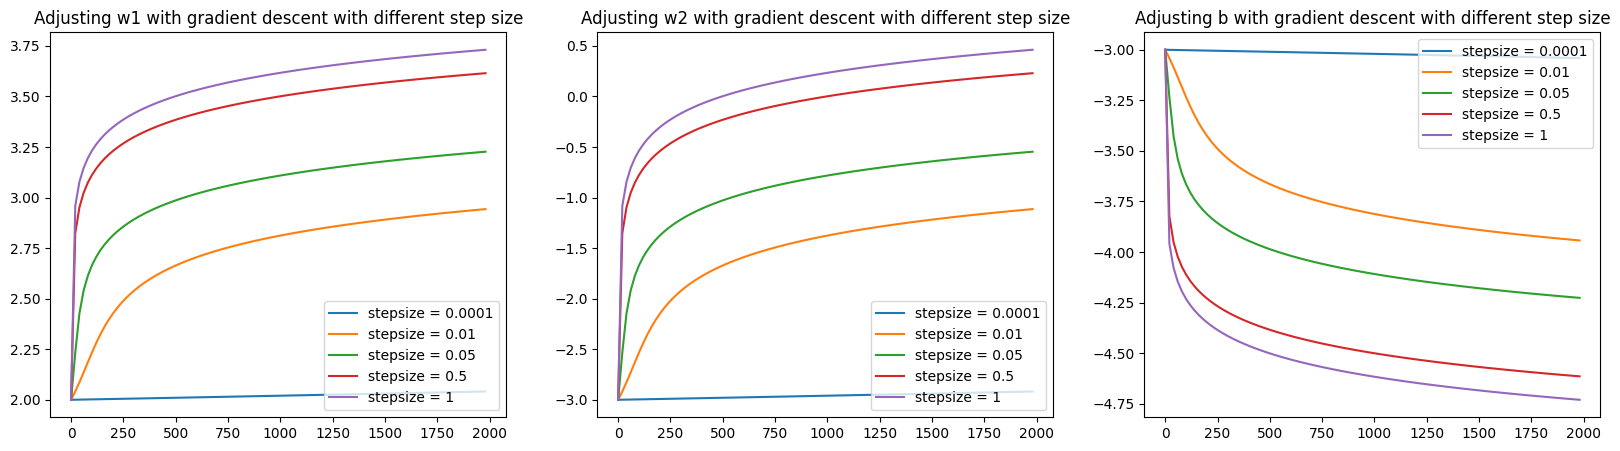

{'w': Array([ 2., -3.], dtype=float32), 'b': -3.0}

In [11]:
params = {'w': jnp.array([2.00, -3.00]), 'b': -3.00}

grad_plot(sigmoid_example,params,x,steps=[0.0001,0.01, 0.05, 0.5, 1],iterations = 2000)